In [1]:
import datetime as dt
import pandas_datareader.data as pdr
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#solve string problem
yf.pdr_override()
#starting setup
tickers = ['ABT', 'JNJ']
from datetime import datetime
startdate = datetime(2007,1,1)
enddate = datetime.now()
google = pdr.get_data_yahoo(tickers,start=startdate, end=enddate ) 
# Create dataframe prices here
prices = pd.DataFrame()
#prices

## Select data(high/low/close/adj) for each year and concatenate with PRICES here 
for year in ['2007','2010','2023']:
    price_per_year = google.loc[year, ['High']].reset_index(drop=True)
    price_per_year.rename(columns={'High': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)


# Plot prices
prices.plot()
plt.show()



ModuleNotFoundError: No module named 'matplotlib'

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

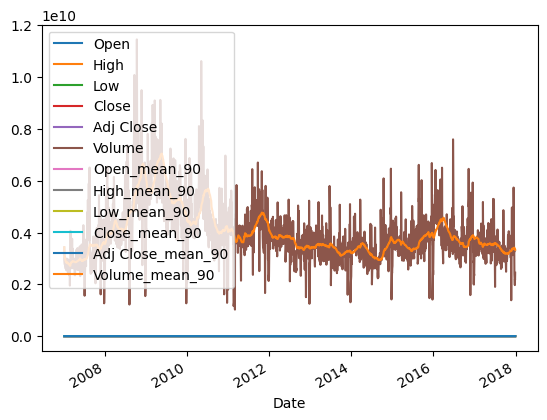

In [10]:
import datetime as dt
import pandas_datareader.data as pdr
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#solve string problem
yf.pdr_override()
##setup data range
tickers = ['^GSPC'] #S&P500 symbol
from datetime import datetime
startdate = datetime(2007,1,1)
enddate = datetime(2017,12,31)
data = pdr.get_data_yahoo(tickers,start=startdate, end=enddate ) 

## 90 DAY ROLLING MEAN
r90 = data.rolling(window='90D').mean()
data.join(r90.add_suffix('_mean_90')).plot()

In [6]:
## EXPANDING WINDOWS IN PANDAS
df = pd.DataFrame({'data': range(5)})
df['expanding sum'] = df.data.expanding().sum()
df['cumulative sum'] = df.data.cumsum()
df


,data,expanding sum,cumulative sum
0,0,0.0,0
1,1,1.0,1
2,2,3.0,3
3,3,6.0,6
4,4,10.0,10


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Import and inspect ozone data here
data = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')
print(data.info())



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2007-06-29 to 2007-09-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sp500   90 non-null     float64
dtypes: float64(1)
memory usage: 1.4 KB
None


[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

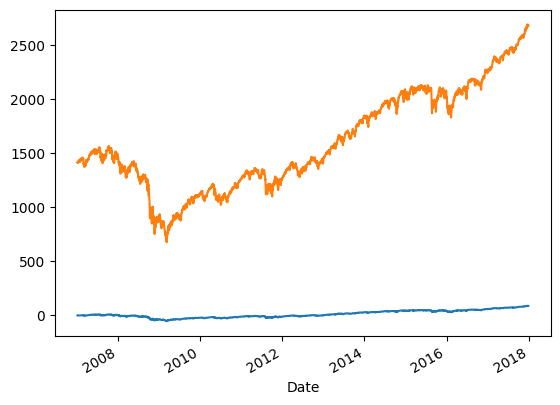

In [12]:
import datetime as dt
import pandas_datareader.data as pdr
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#solve string problem
yf.pdr_override()
#starting setup 
tickers = ['^GSPC'] #S&P500 symbol
from datetime import datetime
startdate = datetime(2007,1,1)
enddate = datetime(2017,12,31)
data = pdr.get_data_yahoo(tickers,start=startdate, end=enddate ) 

## RUNNING RATE OF RETURN IN PRACTICE
pr = data['Close'].pct_change() # period return
pr_plus_one = pr.add(1)
cumulative_return = pr_plus_one.cumprod().sub(1)
cumulative_return.mul(100).plot()

## GETTING THE RUNNING MIN & MAX
data['running_min'] = data['Close'].expanding().min()
data['running_max'] = data['Close'].expanding().max()
data['Close'].plot()

# Plot prices
#data['Close'].plot()
#plt.show()



[*********************100%***********************]  1 of 1 completed


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

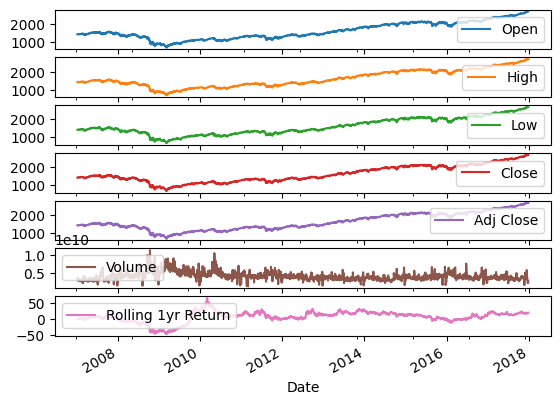

In [3]:
import datetime as dt
import pandas_datareader.data as pdr
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

#solve string problem
yf.pdr_override()
#starting setup 
tickers = ['^GSPC'] #S&P500 symbol
from datetime import datetime
startdate = datetime(2007,1,1)
enddate = datetime(2017,12,31)
data = pdr.get_data_yahoo(tickers,start=startdate, end=enddate) 

## ROLLING ANNUAL RATE OF RETURN
def multi_period_return(period_returns):
   return np.prod(period_returns + 1) - 1

pr = data['Close'].pct_change() # period return
r = pr.rolling('360D').apply(multi_period_return)
data['Rolling 1yr Return'] = r.mul(100)
data.plot(subplots = True)

In [7]:
import datetime as dt
import pandas_datareader.data as pdr
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

#solve string problem
yf.pdr_override()
#starting setup 
tickers = ['GOOGL'] 
from datetime import datetime
startdate = datetime(2007,1,1)
enddate = datetime(2017,12,31)
data = pdr.get_data_yahoo(tickers,start=startdate, end=enddate) 
print(data['Close'])
# Calculate differences
differences = data['Close'].diff().dropna()

# Select start price
start_price = data['Close'].first('D')

# Calculate cumulative sum
cumulative_sum = start_price._append(differences).cumsum()

# Validate cumulative sum equals data
print(data.equals(cumulative_sum))




[*********************100%***********************]  1 of 1 completed
Date
2007-01-03    11.701451
2007-01-04    12.093594
2007-01-05    12.191942
2007-01-08    12.101602
2007-01-09    12.149650
                ...    
2017-12-22    53.443001
2017-12-26    53.292500
2017-12-27    53.009998
2017-12-28    52.797501
2017-12-29    52.669998
Name: Close, Length: 2769, dtype: float64
False


[*********************100%***********************]  2 of 2 completed


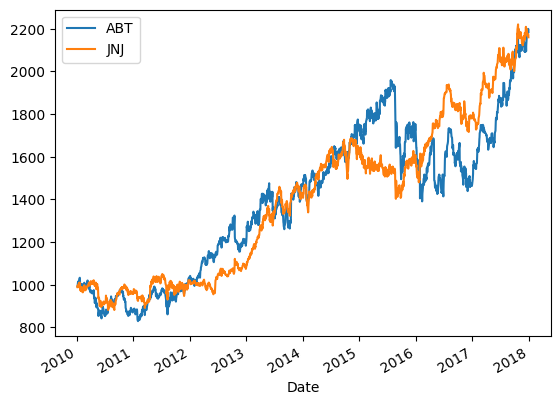

In [1]:
import datetime as dt
import pandas_datareader.data as pdr
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

#solve string problem
yf.pdr_override()
#starting setup 
tickers = ['ABT','JNJ'] ##ABBOT, JOHNSON
from datetime import datetime
startdate = datetime(2010,1,1)
enddate = datetime(2017,12,31)
data = pdr.get_data_yahoo(tickers,start=startdate, end=enddate) 

# Define your investment
investment = 1000

# Calculate the daily returns here
returns = data['Close'].pct_change()

# Calculate the cumulative returns here
returns_plus_one = returns.add(1)
cumulative_return = returns_plus_one.cumprod()

# Calculate and plot the investment return here 
cumulative_return.mul(investment).plot()
plt.show();


Cumulative return on $1,000 invested in google vs apple II
Apple outperformed Google over the entire period, but this may have been different over various 1-year sub periods, so that switching between the two stocks might have yielded an even better result.



Matplotlib is building the font cache; this may take a moment.


[*********************100%***********************]  2 of 2 completed


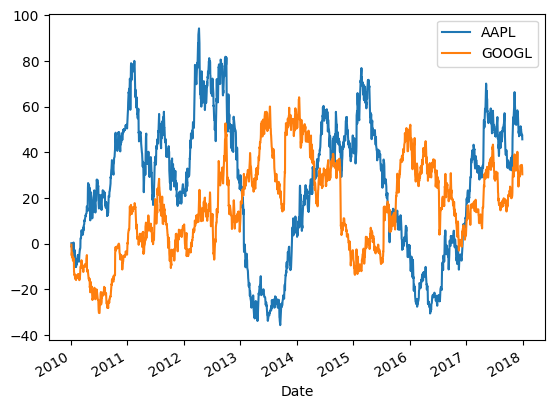

In [1]:
import datetime as dt
import pandas_datareader.data as pdr
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

#solve string problem
yf.pdr_override()
#starting setup 
tickers = ['GOOGL','AAPL'] 
from datetime import datetime
startdate = datetime(2010,1,1)
enddate = datetime(2017,12,31)
data = pdr.get_data_yahoo(tickers,start=startdate, end=enddate) 

# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1
    
# Calculate daily returns
daily_returns = data['Close'].pct_change()

# Calculate rolling_annual_returns
rolling_annual_returns = daily_returns.rolling('360D').apply(multi_period_return)

# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot();
plt.show()

C:\Users\bookk\AppData\Local\Temp\ipykernel_18868\683140838.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random_returns, fit=norm, kde=False)


<Axes: >

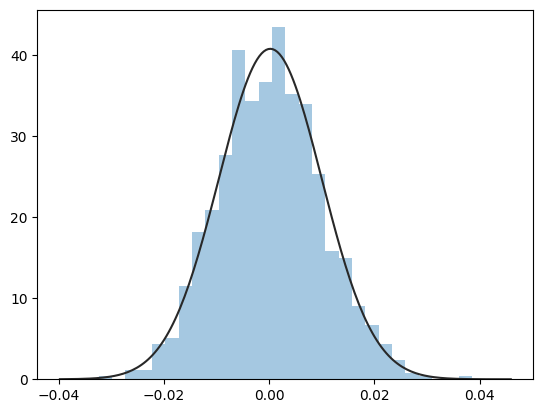

In [6]:
from numpy.random import normal, seed
from scipy.stats import norm
import seaborn as sns
#set seed here
seed(42)
#create random returns
random_returns = normal(loc=0, scale=0.01, size=1000)
#
sns.distplot(random_returns, fit=norm, kde=False)

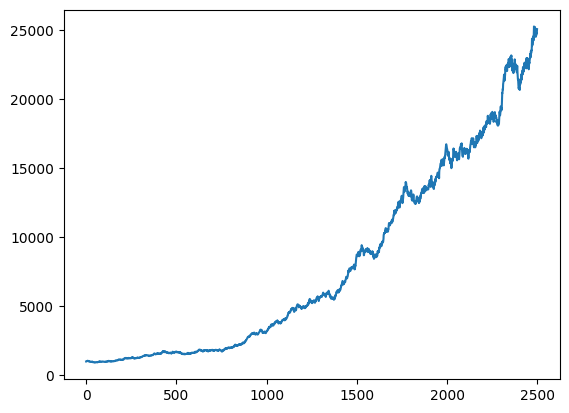

In [8]:
import pandas as pd
from numpy.random import normal, seed
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
#set seed here
seed(42)
#create random_walk
random_walk = normal(loc=.001, scale=0.01, size=2500)
#convert random_walk to pd.series
random_walk = pd.Series(random_walk)
#create random_prices
random_prices = random_walk.add(1).cumprod()
#Plot random_prices here
random_prices.mul(1000).plot()
plt.show();

Random Walk II

[*********************100%***********************]  1 of 1 completed


C:\Users\bookk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


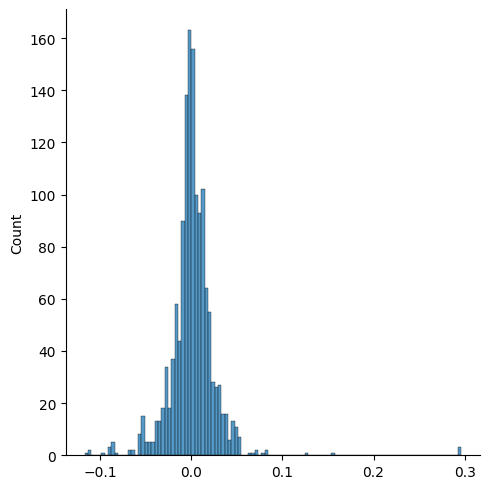

In [7]:
import datetime as dt
import pandas_datareader.data as pdr
import pandas as pd
import numpy as np
from numpy.random import normal, seed, choice
from scipy.stats import norm
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt

#solve string problem
yf.pdr_override()
#starting setup 
tickers = ['META'] 
from datetime import datetime
startdate = datetime(2010,1,1)
enddate = datetime(2017,12,31)
data = pdr.get_data_yahoo(tickers,start=startdate, end=enddate) 
#set seed here
seed(42)
# calculate daily_returns here with pct_change()
daily_returns = data['Close'].pct_change().dropna()

#create a variable n_obs which is count of FB daily_returns
n_obs = daily_returns.count()

#Create random_walk from choice() of a random selection
random_walk = choice(daily_returns, size=n_obs)
#Convert random_walk to pd.series
random_walk = pd.Series(random_walk)
#Plot random_walk distribution
sns.displot(random_walk)
plt.show();

